**Importing all libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Reading the dataset using pandas library**

In [ ]:
dataset = pd.read_csv("Weather prediction dataset - Sheet1.csv")
print ("Total number of rows in dataset: {}\n".format(len(dataset)))
dataset.head()

Total number of rows in dataset: 21



,Day,Month,Year,Humidity,Max Temperature,Min Temperature,Rainfall,Sea Level Pressure,Sunshine,Wind Speed,Cloud
0,1,1,1988,77,26.7,12.9,0,1016.9,8.4,0.0,0
1,2,1,1988,76,26.0,12.9,0,1016.4,8.4,0.0,0
2,3,1,1988,73,27.5,14.5,0,1014.8,7.8,2.0,1
3,4,1,1988,71,27.2,15.8,0,1015.9,6.4,5.0,1
4,5,1,1988,75,27.8,15.4,0,1016.1,8.0,3.5,1


**Declaring the target variable which is to be predicted and the remaining features from the dataset**

In [ ]:
features = ['Day','Month','Year','Humidity','Max Temperature','Min Temperature',
            'Rainfall','Sea Level Pressure','Sunshine','Wind Speed']
target = 'Cloud'

**Splitting the dataset into train and test dataset in the ratio 70:30**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features], dataset[target],
                                                     test_size=0.3, random_state=42)

**Printing length of training set**

In [ ]:
print("X_train: {}, X_test: {}".format(len(x_train), len(x_test)))
print("Y_train: {}, Y_test: {}".format(len(y_train), len(y_test)))

X_train: 14, X_test: 7
Y_train: 14, Y_test: 7


**Since the data is in different units we standardise it using the StandardScaler library The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.**

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
print(x_train)

[[-1.36414704  0.          0.         -1.08458937  0.02435405  1.44049787
   0.          0.58381938 -2.88188704  1.88702608]
 [ 1.21667168  0.          0.         -0.6952496  -0.65755938 -1.55869256
   0.         -1.12517917  1.18286408  0.02220031]
 [ 0.87256252  0.          0.         -1.86326892 -2.19186461  0.50971463
   0.          0.95534081  0.88177141  0.02220031]
 [ 0.35639878  0.          0.          1.25144928  0.53578913  1.44049787
   0.         -0.90226632 -0.47314563  1.88702608]
 [-1.53620162  0.          0.         -0.30590982  0.53578913  0.09603319
   0.         -0.23352775 -0.77423831  0.02220031]
 [-0.33181955  0.          0.          1.25144928 -0.65755938 -0.31764825
   0.          1.17825366  0.73122507  0.02220031]
 [ 1.56078085  0.          0.         -1.08458937 -0.31660267 -1.66211292
   0.         -2.01683059  0.43013239  0.02220031]
 [-1.19209246  0.          0.          0.47276973  1.0472242   1.02681643
   0.          0.73242795 -0.47314563  0.95461319]


**Training the Logistic Regression model with x_train and y_train**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Printed the training accuracy and testing accuracy**

In [ ]:
print("Showing Performance Metrics for Logistic Regression\n")

print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

Showing Performance Metrics for Logistic Regression

Training Accuracy: 1.0
Testing Accuracy: 0.8571428571428571


**Printing the Cross Validation accuracy after 2 folds**

In [ ]:
print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=model, X=x_train, y=y_train, cv=2)
print("Accuracy using 2 folds: ")
print(cv_accuracy)

Cross Validation Accuracy: 

Accuracy using 2 folds: 
[0.85714286 1.        ]


**Printing the Mean Accuracy and Standard Deviation**

In [ ]:
print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

Mean accuracy: 0.9285714285714286
Standard Deviation: 0.07142857142857145


**Plotted the confusion matrix for it**

In [ ]:
print("Confusion Matrix for Logistic Regression\n")

cm = confusion_matrix(y_test, predicted)
print(cm)

Confusion Matrix for Logistic Regression

[[5 0]
 [1 1]]


**Displayed the classification report with parameters like precision , recall , f1-score and accuracy of the model**

In [ ]:
print('Precision, Recall and f-1 Scores for Logistic Regression\n')
print(classification_report(y_test, predicted))

Precision, Recall and f-1 Scores for Logistic Regression

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



**Plotted the graphical confusion martix**

[[5 0]
 [1 1]]
0.8571428571428571


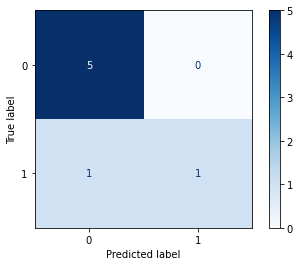

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_test,predicted)
acc = accuracy_score(y_test,predicted)
print(cm)
print(acc)
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
plt.show()